In [1]:
# Set up the coding environment
import numpy as np # linear algebra
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [2]:
# Read data 
path_filename=r'C:\Users\user\Desktop\MyProject\tv_shows\tv_shows.csv' 
df=pd.read_csv(path_filename)

In [3]:
# Have a quick view of the dataset. 
df.info()
df.info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
Unnamed: 0         5611 non-null int64
Title              5611 non-null object
Year               5611 non-null int64
Age                3165 non-null object
IMDb               4450 non-null float64
Rotten Tomatoes    1011 non-null object
Netflix            5611 non-null int64
Hulu               5611 non-null int64
Prime Video        5611 non-null int64
Disney+            5611 non-null int64
type               5611 non-null int64
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


<bound method DataFrame.info of       Unnamed: 0                                           Title  Year  Age  \
0              0                                    Breaking Bad  2008  18+   
1              1                                 Stranger Things  2016  16+   
2              2                                     Money Heist  2017  18+   
3              3                                        Sherlock  2010  16+   
4              4                                Better Call Saul  2015  18+   
5              5                                      The Office  2005  16+   
6              6                                    Black Mirror  2011  18+   
7              7                                    Supernatural  2005  16+   
8              8                                  Peaky Blinders  2013  18+   
9              9                      Avatar: The Last Airbender  2005   7+   
10            10                                The Walking Dead  2010  18+   
11            11    

##### The dataset has 11 columns in total; the data includes the information related to more than 5000 TV shows,such as the TV show titles, the production date(year) . <br><br>To ensure a good quality of data analysis, it's crucial to  preprocess the data, such as removing '%' and converting data type in some columns.<br><br> The main goal for this project is to understand the trend in U.S. TV shows.Several questions for this project are made below: 

1.The distribution of age restriction on U.S. TV shows ?<br> 
2.The most popular U.S. TV shows ? <br>
3.What is the distribution of the top 100 IMDb rating U.S. TV shows on different platforms ? <br>
4.Which U.S. TV shows we should recommend ?<br>

In [4]:
#Remove '%' in 'Rotten Tomatoes' column.  
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.strip('%')


In [5]:
# Convert 'Rotten Tomatoes' to float 
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].astype('float')

In [6]:
# Remove “+” in Age column
df['Age']=df['Age'].str.strip('+')

In [7]:
# Because some values are 'all'.So, if the value is not numeric, convert to 'NaN' which will be removed later. 
# Covert 'Age' to float 


df['Age'] = pd.to_numeric(df['Age'],errors='coerce')
df['Age'] = df['Age'].astype('float')
df.Age.describe

<bound method NDFrame.describe of 0       18.0
1       16.0
2       18.0
3       16.0
4       18.0
5       16.0
6       18.0
7       16.0
8       18.0
9        7.0
10      18.0
11      16.0
12      18.0
13      16.0
14      18.0
15      18.0
16       7.0
17      18.0
18      16.0
19      18.0
20      18.0
21      18.0
22      18.0
23      16.0
24      18.0
25      18.0
26      18.0
27      16.0
28      18.0
29      16.0
        ... 
5581    16.0
5582     NaN
5583     NaN
5584     7.0
5585     NaN
5586     NaN
5587     NaN
5588     7.0
5589     7.0
5590     NaN
5591     NaN
5592     NaN
5593     NaN
5594     NaN
5595     NaN
5596     NaN
5597     NaN
5598     7.0
5599     NaN
5600     NaN
5601     NaN
5602     NaN
5603     NaN
5604     NaN
5605     NaN
5606     NaN
5607     NaN
5608     NaN
5609     NaN
5610     NaN
Name: Age, Length: 5611, dtype: float64>

In [8]:
#Remove the column 'Unnamed: 0'
df.drop('Unnamed: 0',1,inplace=True)

In [9]:
#Find the missing data
missingdata=df.isnull()
missingdata

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [10]:
# Print the total missing numbers in each columns
df.isnull().sum()  

# The number of the missing data is large, for exampple there is 4600 in column Rotten Tomatoes.
# All the rows with missing values have to be deleted due to the incorrect calculation may occur; 
# however, some of the data analysis may need all the data without cleaning, 
# such as when calculating the number of TV shows in Netflix, as the deleted rows may reduce this number. 


Title                 0
Year                  0
Age                2991
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

In [11]:
# Remove rows with 'NaN'
cleaned_data=df.dropna()
cleaned_data

#As a result,more than 4600 rows are removed, only 915 rows left.

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,Breaking Bad,2008,18.0,9.5,96.0,1,0,0,0,1
1,Stranger Things,2016,16.0,8.8,93.0,1,0,0,0,1
2,Money Heist,2017,18.0,8.4,91.0,1,0,0,0,1
3,Sherlock,2010,16.0,9.1,78.0,1,0,0,0,1
4,Better Call Saul,2015,18.0,8.7,97.0,1,0,0,0,1
5,The Office,2005,16.0,8.9,81.0,1,0,0,0,1
6,Black Mirror,2011,18.0,8.8,83.0,1,0,0,0,1
7,Supernatural,2005,16.0,8.4,93.0,1,0,0,0,1
8,Peaky Blinders,2013,18.0,8.8,92.0,1,0,0,0,1
9,Avatar: The Last Airbender,2005,7.0,9.2,100.0,1,0,0,0,1


### Q1. The age restriction on U.S. TV shows 

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'The age restriction distribution on the U.S TV shows ')

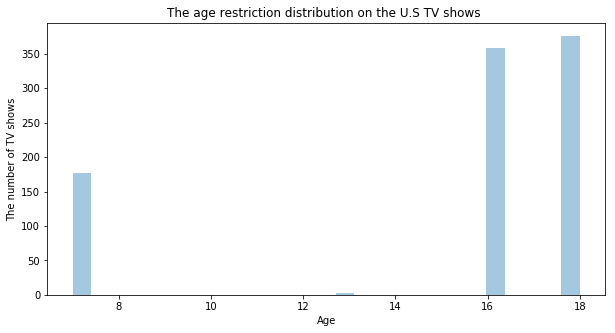

In [40]:
# An overview of the age restriction distribution on U.S TV shows 
plt.figure(figsize=(10,5))
sns.distplot(cleaned_data.Age,kde=False)
plt.ylabel('The number of TV shows')
plt.title('The age restriction distribution on the U.S TV shows ')

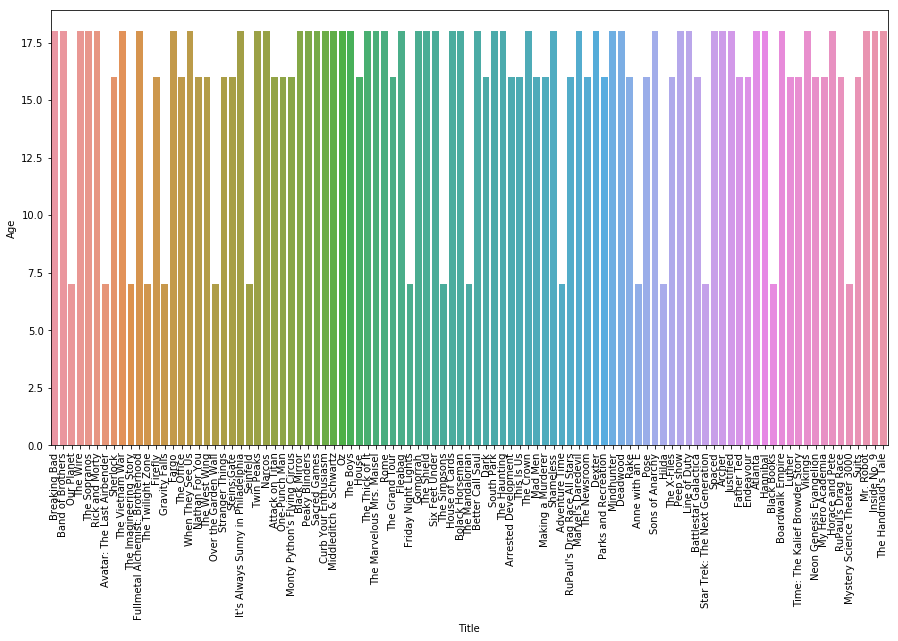

In [13]:
# A quick glimpse of the age restriction distribution on U.S. TV shows(top 100 IMDb rating, with cleaned data) 
imdb_cleaned=cleaned_data.sort_values(('IMDb'),ascending=False)
imdb100_cleaned=imdb_cleaned.head(100)

plt.figure(figsize=(15,8))
chart=sns.barplot(x=imdb100_cleaned.Title,y=imdb100_cleaned.Age)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()



##### The trending is age 16+ U.S. TV shows are more popular and common.

### <u>Q2. The most popular U.S. TV shows ?</u>

In [43]:
# Top 10 IMDb rating. Since the cleaned data has reduced many rows, 
# I will only use the cleaned dataset for analysis that involves calculation.
imdb=df.sort_values('IMDb',ascending=False)

imdb_10=imdb.head(10)

# Create list for the top 10 TV shows
imdb_list=[]
for rows in imdb_10.itertuples():
    list=[rows.Title]
    imdb_list.append(list)

print('The top 10 IMDb TV shows are :')
print(imdb_list)


The top 10 IMDb TV shows are :
[['Destiny'], ['Breaking Bad'], ['Malgudi Days'], ['Hungry Henry'], ['Band of Brothers'], ['The Joy of Painting'], ['Green Paradise'], ['Our Planet'], ['The Wire'], ['Ramayan']]


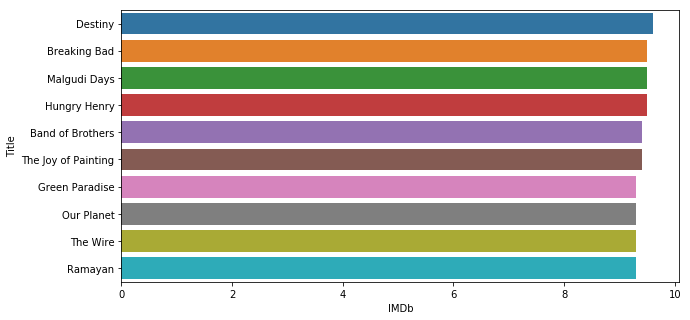

In [15]:
# Barplot of TV shows in top 10 IMDb rating 
plt.figure(figsize=(10,5))
sns.barplot(x="IMDb", y="Title",data= df.sort_values("IMDb",ascending=False).head(10))

In [44]:
#Top 10 Rotten Tomatoes rating   
rt=df.sort_values('Rotten Tomatoes',ascending=False)
rt_10=rt.head(10)

# Creat list for the top 10 TV shows
rt_list=[]
for rows in rt_10.itertuples():
    list=[rows.Title]
    rt_list.append(list)

print('The top 10 "Rotten Tomatoes" TV shows are :')
print(rt_list)

The top 10 "Rotten Tomatoes" TV shows are :
[['Green Eggs and Ham'], ['Fleabag'], ["Sherman's Showcase"], ['Big Mouth'], ['My Hero Academia'], ['Better Than Us'], ['Fauda'], ['Flirty Dancing'], ['The Confession Tapes'], ['Afro Samurai']]


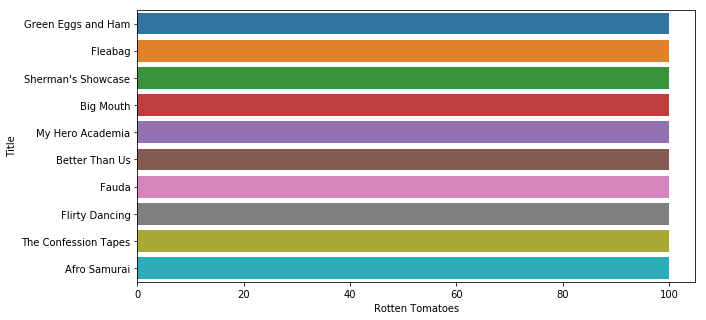

In [17]:
# Barplot of TV shows in top 10 'Rotten Tomatoes'  rating 
plt.figure(figsize=(10,5))
sns.barplot(x="Rotten Tomatoes", y="Title",data= df.sort_values("Rotten Tomatoes",ascending=False).head(10))

### The difference b/w the IMDb and the Rotten Tomatoes on ratings :  

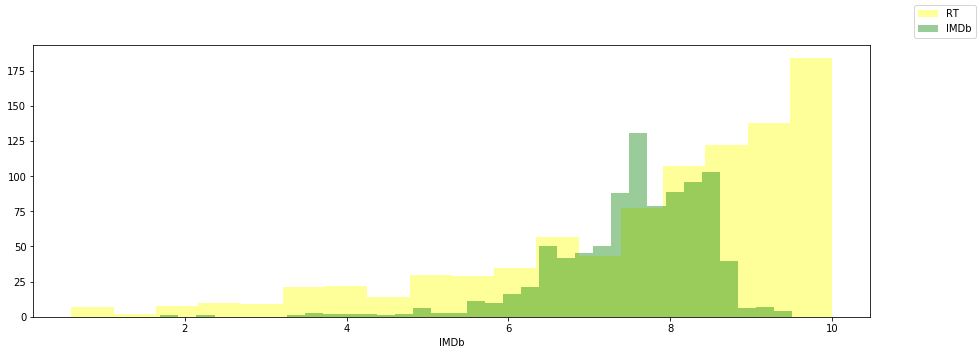

In [18]:
# Plot 'Rotten Tomatoes' and 'IMDb' rating 
fig=plt.figure(figsize=(15,5))
sns.distplot(a=cleaned_data['Rotten Tomatoes']/10,color='yellow', kde=False)#The rating is divided by 10 for comparsion with the samew unit.
sns.distplot(a=cleaned_data['IMDb'],color='green', kde=False)
fig.legend(labels=['RT','IMDb'])



##### The range of Rotten Tomatoes rating is much broader than IMDb rating that may make readers question about how accurate Rotten Tomatoes rating is. For example, there are 10 TV shows rated as 100% and 50 TV shows are rated less than 35%.<br><br>The Rotten Tomatoes rating does not indicate the popularity of a TV show, it can only reveal how many audiences see the TV shows as positive or negative；therefore, I consider the IMDb rating as the main indicator for a good show and use the Rotten Tomatoes rating for a second support. 



### Q3. <u>How is the distribution of the top 100 IMDb rating TV shows on different platforms ?</u>

In [19]:
# Compare the number of top 100 IMDb rating TV shows in 
# Netflix, Hulu, PrimeVideo and Disney+.
# Here I use df instead of cleaned_data as the dataframe, as some of the rows with missing value are dropped and 
# this will affect the number of Netflix TV shows.

imdb_netflix100=df.sort_values(('IMDb'),ascending=False).head(100)['Netflix']
print("The number of Netflix TV shows in top 100 IMDb rating is", imdb_netflix100.sum())


The number of Netflix TV shows in top 100 IMDb rating is 41


In [20]:
# Total of Netflix TV shows 
netflix=df[df['Netflix']== 1]
print("Total number of shows on Netflix= ", len(netflix))
print('The average of TV shows in top IMDb 100 list:',(imdb_netflix100.sum()/len(netflix))*100,'%')

Total number of shows on Netflix=  1931
The average of TV shows in top IMDb 100 list: 2.1232522009321597 %


In [21]:
imdb_disney100=df.sort_values(('IMDb'),ascending=False).head(100)['Disney+']
print("The number of Disney+ TV shows in top 100 IMDb rating is", imdb_disney100.sum())

The number of Disney+ TV shows in top 100 IMDb rating is 3


In [22]:
# Total of Disney TV shows 
disney=df[df['Disney+']== 1]

print("Total number of shows on Netflix= ", len(disney))
print('The average of TV shows in top IMDb 100 list:',(imdb_disney100.sum()/len(disney))*100,'%')

Total number of shows on Netflix=  180
The average of TV shows in top IMDb 100 list: 1.6666666666666667 %


In [23]:
imdb_hulu100=df.sort_values(('IMDb'),ascending=False).head(100)['Hulu']
print("The number of Hulu TV shows in top 100 IMDb rating is", imdb_hulu100.sum())

The number of Hulu TV shows in top 100 IMDb rating is 38


In [24]:
# Total of Hulu TV shows 
hulu=df[df['Hulu']== 1]

print("Total number of shows on Netflix= ", len(hulu))
print('The average of TV shows in top IMDb 100 list:',(imdb_hulu100.sum()/len(hulu))*100,'%')

Total number of shows on Netflix=  1754
The average of TV shows in top IMDb 100 list: 2.1664766248574687 %


In [25]:
imdb_prime100=df.sort_values(('IMDb'),ascending=False).head(100)['Prime Video']
print("The number of PrimeVideo TV shows in top 100 IMDb rating is", imdb_prime100.sum())

The number of PrimeVideo TV shows in top 100 IMDb rating is 35


In [26]:
# Total of Disney TV shows 
prime=df[df['Prime Video']== 1]

print("Number of shows on Netflix= ", len(prime))
print('The average of TV shows in top IMDb 100 list:',(imdb_prime100.sum()/len(prime))*100,'%')

Number of shows on Netflix=  2144
The average of TV shows in top IMDb 100 list: 1.632462686567164 %


Text(0.5, 1.0, 'The average of TV shows in top IMDb 100 list')

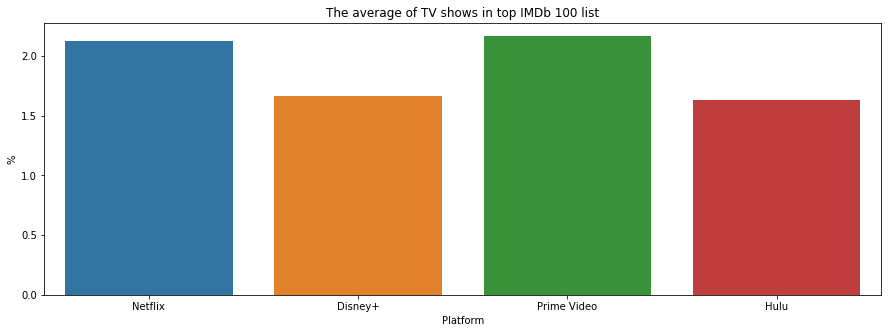

In [27]:
# Create a barplot to display the average of TV shows in top IMDb 100 list

list1=[['Netflix',2.1232522009321597],['Disney+',1.6666666666666667],['Prime Video',2.1664766248574687],['Hulu',1.632462686567164]]

df_percent=pd.DataFrame(list1, columns =['Platform','%'])
df_percent
plt.figure(figsize=(15,5))
ax= sns.barplot(x="Platform", y="%",data=df_percent)
ax.set_title('The average of TV shows in top IMDb 100 list')

##### It shows that Netflix has more TV shows in the top 100 IMDb rating; while Disney+ releases much fewer favourite shows than other competitors. However, it doesn't mean Disney+ TV shows are not good because they have released only 180 TV shows in this dataset.

### Q4. Which TV shows we should recommend?

In [28]:
##### I will use KMeans algorithum to group the clusters in order to make TV shows recommendations. 

In [29]:
# Use the cleaned data to generate a dataframe with Imdb and Rotten Tomatoes ratings
ratings= cleaned_data[['Title','IMDb','Rotten Tomatoes']]
ratings.head()


,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,9.5,96.0
1,Stranger Things,8.8,93.0
2,Money Heist,8.4,91.0
3,Sherlock,9.1,78.0
4,Better Call Saul,8.7,97.0


In [30]:
# Mutliply IMDb rating by 10, so that it has the same scale as Rotten Tomatoes ratings. 
ratings['IMDb']=ratings['IMDb']*10
ratings

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,IMDb,Rotten Tomatoes
0,Breaking Bad,95.0,96.0
1,Stranger Things,88.0,93.0
2,Money Heist,84.0,91.0
3,Sherlock,91.0,78.0
4,Better Call Saul,87.0,97.0
5,The Office,89.0,81.0
6,Black Mirror,88.0,83.0
7,Supernatural,84.0,93.0
8,Peaky Blinders,88.0,92.0
9,Avatar: The Last Airbender,92.0,100.0


In [31]:
# Create a x value, the dataframe of IMDb and Rotten Tomatoes ratings
x=ratings[['IMDb','Rotten Tomatoes']]

In [32]:
# Create KMeans algorithum. 
# WCSS is the sum of squared distance b/w each sactters in the cluster and its centroid.

from sklearn.cluster import KMeans

wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

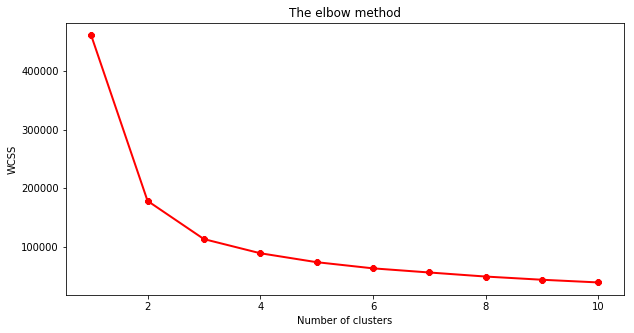

In [33]:
# Find the optimal number of clusters
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss,linewidth=2, color='red', marker='8')
plt.title('The elbow method')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()
# It looks like the optimal number of clusters is 3

In [34]:
# We now have the optimal number of clusters and the KMeans algorithim, we can predict the y values
km=KMeans(n_clusters=3)
km.fit(x)
y=km.predict(x)


In [35]:
# Create label column that contains y values for segmentation. 
ratings["label"] = y
ratings.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Title,IMDb,Rotten Tomatoes,label
0,Breaking Bad,95.0,96.0,0
1,Stranger Things,88.0,93.0,0
2,Money Heist,84.0,91.0,0
3,Sherlock,91.0,78.0,0
4,Better Call Saul,87.0,97.0,0


Text(0.5, 1.0, 'IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')

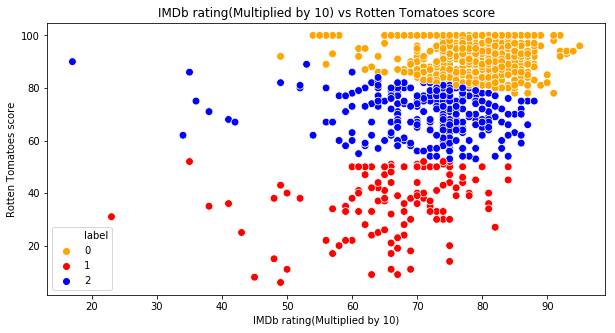

In [36]:
# We have the y values for segmentation, we can plot a graph to display the three TV shows groups. 
plt.figure(figsize=(10,5))

sns.scatterplot(x = 'IMDb',y = 'Rotten Tomatoes',hue="label",  
                 palette=['orange','red',"blue"], legend='full',data = ratings  ,s = 60 )

plt.xlabel('IMDb rating(Multiplied by 10)')
plt.ylabel('Rotten Tomatoes score') 
plt.title('IMDb rating(Multiplied by 10) vs Rotten Tomatoes score')

In [37]:
# Check the total numbers in the three clusters.

print('The total number of  TV Shows in Cluster 0 is:')
print(len(ratings[ratings["label"]==0]))

print('The total number of TV Shows in Cluster 1  is:')
print(len(ratings[ratings["label"]==1]))

print('The total number of TV Shows in Cluster 2 is:')
print(len(ratings[ratings["label"]==2]))



The total number of  TV Shows in Cluster 0 is:
516
The total number of TV Shows in Cluster 1  is:
123
The total number of TV Shows in Cluster 2 is:
276


In [38]:
# All the TV shows in cluster 0
print('TV Shows in cluster 0:')

print(ratings[ratings["label"]==0]["Title"].values)

TV Shows in cluster 0:
['Breaking Bad' 'Stranger Things' 'Money Heist' 'Sherlock'
 'Better Call Saul' 'The Office' 'Black Mirror' 'Supernatural'
 'Peaky Blinders' 'Avatar: The Last Airbender' 'The Walking Dead' 'Dark'
 'Ozark' 'Attack on Titan' 'Narcos' 'Fullmetal Alchemist: Brotherhood'
 'Community' 'Mindhunter' 'Parks and Recreation' "Marvel's Daredevil"
 'Twin Peaks' 'One-Punch Man' 'Outlander' 'House of Cards' 'Shameless'
 'The Good Place' 'The Haunting' 'The Blacklist' 'The Flash'
 'The Last Kingdom' 'Mad Men' 'Lucifer' 'Orange Is the New Black'
 "Grey's Anatomy" 'The End of the F***ing World' 'The Vampire Diaries'
 'The Crown' 'The 100' 'When They See Us' 'How to Get Away with Murder'
 'Elite' 'BoJack Horseman' 'Never Have I Ever' 'Penny Dreadful'
 "Marvel's Agents of S.H.I.E.L.D." 'Dead to Me' 'Unorthodox' 'Sense8'
 'Sacred Games' 'American Crime Story' 'Unbelievable' 'Arrow'
 'The IT Crowd' 'The Twilight Zone' 'YOU' 'Sex Education'
 'Tiger King: Murder, Mayhem and Madness' 'Sta

In [39]:
# All the TV shows in cluster 2
print('TV Shows in cluster 2:')
print(ratings[ratings["label"]==2]["Title"].values)

TV Shows in cluster 2:
['Dexter' 'The Witcher' 'Arrested Development' 'After Life' 'Family Guy'
 'Pretty Little Liars' 'Altered Carbon' 'The Umbrella Academy'
 "Marvel's The Punisher" 'The West Wing' 'Once Upon a Time' 'Gotham'
 'Waco' 'Outer Banks' 'Anne with an E' 'Weeds' 'Lost in Space' 'Charmed'
 'Locke & Key' 'Hollywood' 'The Tudors' 'The Inbetweeners' 'Marco Polo'
 'Designated Survivor' 'Hell on Wheels' "Marvel's The Defenders"
 'Star Trek: Voyager' 'Limitless' 'The Shannara Chronicles' 'Haven'
 'Queen of the South' 'Bloodline'
 "Don't F**k with Cats: Hunting an Internet Killer" 'Lost Girl' 'Episodes'
 'Disenchantment' 'Madam Secretary' 'Glee' 'Helix' 'Safe' 'Evil Genius'
 'Lilyhammer' 'Glitch' 'Dracula' 'Quantico' 'Versailles'
 'Everything Sucks!' 'Raising Dion' 'The Rain' 'Star-Crossed'
 'The Politician' 'Baby' 'Marcella' 'The Circle' 'Frontier' 'Frequency'
 'Seven Seconds' 'Spinning Out'
 'Killer Inside: The Mind of Aaron Hernandez' 'Derek' 'Mars'
 'Love is Blind' 'Zoo' 'Daybr

##### The Final result: <br><br>The TV shows in cluster 0 are usually the good shows . Cluster 0 TV shows receive more postive comments from users based on the IMDb and Rotten Tomatoes ratings. <br><br> In the cluster 2, the TV shows are unlikely popular; but it doesn't mean all the shows in this cluster are bad. <br><br>Therefore, If we have to make a recommendation on U.S. TV shows to people, cluster 0 is the recommended list to watch.   